In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [5]:
# As first step we will generate synthetics data.
X = np.random.randn(100, 2)

For this purpose I have created an X feature matrix with 100 samples and 2 features. The values were created using a standard normal distribution (mean = 0, variance = 1), meaning they are centered around zero.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


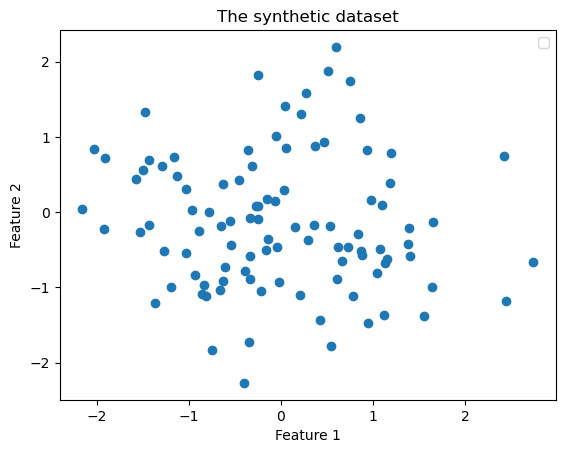

In [6]:
plt.plot(X[:,0],X[:,1], ls = " ", marker = "o")
plt.title("The synthetic dataset", size = 12)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

In [7]:
y = (X[:, 0] + X[:, 1] > 0).astype(int) # Then we create a target vector

The target vector generates the corresponding output labels. With the help of these labels are created based on a simple linear rule for this example:
* if the sum of the two features (X[:, 0] and X[:, 1]) is positive, the data point is assigned to class 1. 
* Otherwise, it is assigned to class 0. 

In [8]:
# We define the sigmoid function to map the real numbers to a probability between 0 and 1.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
def log_likelihood(X, y, w, b):
    z = np.dot(X, w) + b # As per definition, we calculate the linear predictor z for all samples.
   
    p = sigmoid(z) # And apply the sigmoid function to get the predicted probabilites.
    
    
    p = np.clip(p, 1e-15, 1 - 1e-15) # By clipping the data we avoid calculating the logarithm of 0 and 1, ensuring a higher numerical stability
    
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p)) # Finally we use this formula which is derived from the Bernoulli distribution's.
    # The goal is to maximize this in the end.

In [21]:
def fit(X, y, learning_rate, n_iterations):
    w = np.zeros(X.shape[1])
    b = 0

    for i in range(n_iterations):
        z = np.dot(X, w) + b
        p = sigmoid(z) 

        # As per the definition of the gradient we calculate the gradients for w and b
        dw = np.dot(X.T, (y - p)) / X.shape[0]
        db = np.sum(y - p) / X.shape[0]

        # Update parameters
        w += learning_rate * dw
        b += learning_rate * db

        # We print the log-likelihood every 1000 iterations to monitor the training process
        if i % 1000 == 0:
            ll = log_likelihood(X, y, w, b)
            print(f"Iteration {i}: Log-Likelihood = {ll}")

    return w, b

Iteration 0: Log-Likelihood = -69.17563643603228
Iteration 1000: Log-Likelihood = -30.136730618796786
Iteration 2000: Log-Likelihood = -23.19380431486993
Iteration 3000: Log-Likelihood = -19.8695452182645
Iteration 4000: Log-Likelihood = -17.803843172352085
Iteration 5000: Log-Likelihood = -16.352456459676354
Iteration 6000: Log-Likelihood = -15.256753455143347
Iteration 7000: Log-Likelihood = -14.389544093393493
Iteration 8000: Log-Likelihood = -13.679787144798324
Iteration 9000: Log-Likelihood = -13.08416192470023


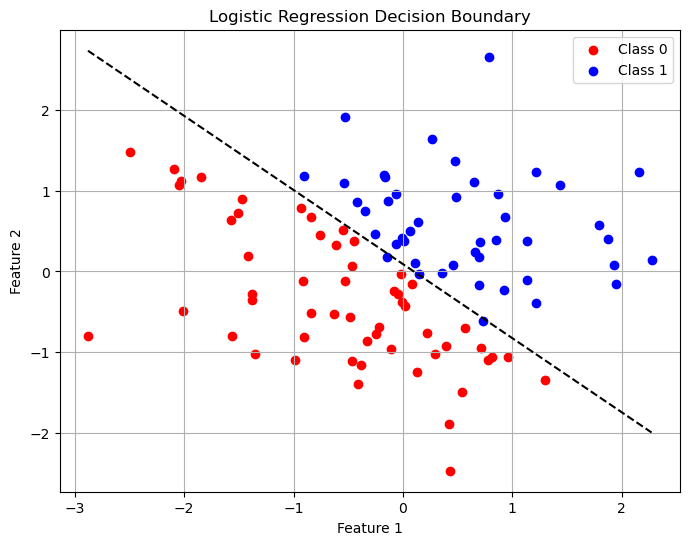

In [47]:
# Train the model
learning_rate = 0.01
n_iterations = 10000
w, b = fit(X, y, learning_rate, n_iterations)

# Plot the decision boundary
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(8, 6))
    
    # Plot data points
    plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0', color='red')
    plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1', color='blue')
    
    # Create the decision boundary line
    x_vals = np.array([X[:, 0].min(), X[:, 0].max()])
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k--')
    
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, w, b)

# A second test

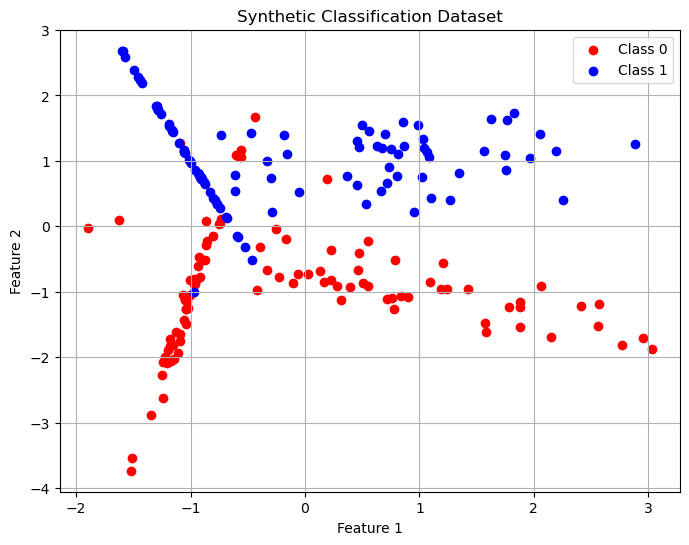

In [38]:
# We can also use sklearn to generate a more complex synthetic dataset, with overlapping classes.
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=2, class_sep=1.0, )

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')
plt.title('Synthetic Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Iteration 0: Log-Likelihood = -133.67867697984775
Iteration 1000: Log-Likelihood = -51.02333279142684
Iteration 2000: Log-Likelihood = -51.018521705677415
Iteration 3000: Log-Likelihood = -51.01851526951404
Iteration 4000: Log-Likelihood = -51.01851526054408
Iteration 5000: Log-Likelihood = -51.01851526053155
Iteration 6000: Log-Likelihood = -51.01851526053153
Iteration 7000: Log-Likelihood = -51.01851526053153
Iteration 8000: Log-Likelihood = -51.01851526053153
Iteration 9000: Log-Likelihood = -51.018515260531544


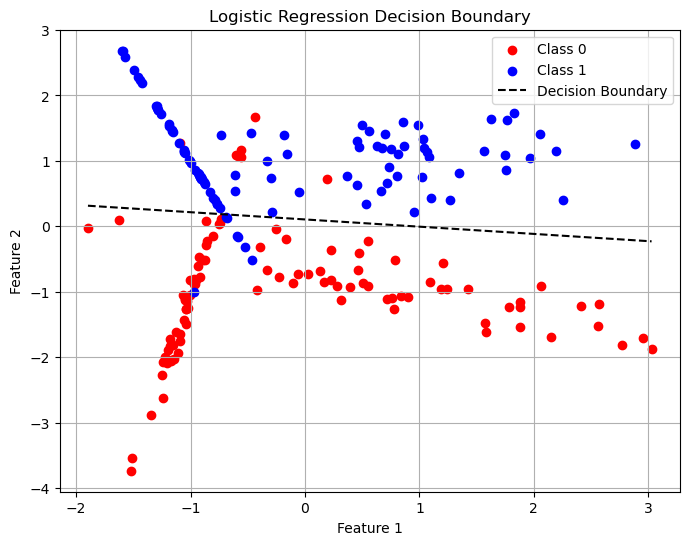

Training accuracy: 0.93


In [41]:
# We train the model again on the new dataset
learning_rate = 0.1
n_iterations = 10000
w, b = fit(X, y, learning_rate, n_iterations)



# Predict and show accuracy
def predict(X, w, b):
    return (sigmoid(np.dot(X, w) + b) >= 0.5).astype(int) # We predict class labels based on a threshold of 0.5

plot_decision_boundary(X, y, w, b)
y_pred = predict(X, w, b)
accuracy = np.mean(y_pred == y) # To quantify the model's performance, we calculate the  mean of  correct predcitions in comparison to the true labels.
print(f"Training accuracy: {accuracy:.2f}")

# Test of C++ code

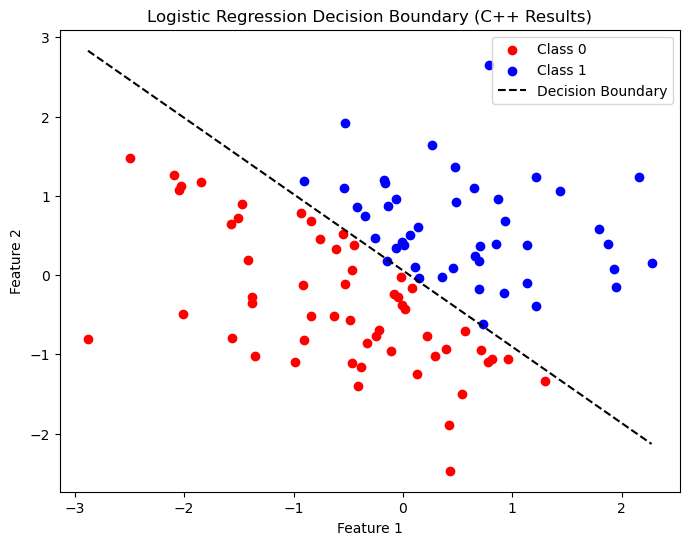

In [ ]:
# We prelod the weights and bias from the C++ implementation to compare the results.
with open("weights_bias.txt", "r") as f:
    line = f.readline().strip().split()
    w = np.array([float(x) for x in line[:-1]])
    b = float(line[-1])

# Load synthetic data generated by C++
data = np.loadtxt("synthetic_data.txt")
X = data[:, :2]
y = data[:, 2].astype(int)


plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')


x_vals = np.array([X[:, 0].min(), X[:, 0].max()])
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.title('Logistic Regression Decision Boundary (C++ Results)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()